# Tortuosity

The *tortuosity* is a measure of the *detour* that a percolating diffusion pathway takes.  If the length of the diffusion pathway between two periodic images of the same site is $L$ and the total distance between the periodic images is $D$, the tortuosity is

\begin{equation}
  \tau = \frac{L}{D}
  \quad .
\end{equation}

This means, a tortuosity of $1$ is ideal (no detour), and the larger the tortuosity becomes, the greater the detour that has to be taken.

## Input File

Here, we will determine the tortuosity for the nearest-neighbor site percolation problem of [Example 0](../00-Command-Line-Usage/example00.ipynb). Once again, the same general input file can be used:

In [1]:
%%writefile input-bond-rule.json
{
    "structure": "../LiMO2-Crystal-Structures/Cu-fcc.vasp",
    "formula_units": 1.0,
    "sublattices": {
        "A": {
            "description": "Copper sites",
            "sites": {"species": ["Cu"]},
            "initial_occupancy": {"Vac": 1.0}
        }
    },
    "bonds": [
        {
            "sublattices": ["A", "A"],
            "bond_rules": [["NearestNeighborBR"]]
        }
    ],
    "percolating_species": ["Cu"],
    "flip_sequence": [["Vac", "Cu"]]
}

Overwriting input-bond-rule.json


See [Example 0](../00-Command-Line-Usage/example00.ipynb) for a detailed discussion of the input file.

## Calculation using the Command Line Tool

The tortuosity is computed by `Dribble`'s command line tool if the `-t` (or `--tortuosity`) flag is present.  Once again, care has to be taken to select a sufficiently large supercell.  Note, however, that computing the tortuosity can be extremely time consuming, as it involves determining the shortest pathway between two endpoints on a graph (the network of percolating pathways).  Therefore, we will use a much smaller supercell and fewer MC samples for this example:

In [4]:
! dribble input-bond-rule.json --supercell 4 4 4 -t --samples 10


 Parsing input file 'input-bond-rule.json'... done.

 Setting up lattice and neighbor lists... done.

 Lattice and Sites
 -----------------

 Lattice vectors:

     0.00000000    7.20000000    7.20000000
     7.20000000    0.00000000    7.20000000
     7.20000000    7.20000000    0.00000000

 total number of sites : 64
 occupied sites        : 0 (0 static)
 vacant sites          : 64 (0 static)
 number of NNs         : 12

 Neighbor List
 -------------

 interaction range          : NNs only
 boxes per lattice direction: 2 2 2
 total number of atoms      : 64
 av. number of atoms per box: 8.0

 Initializing percolator... done.

 MC percolation simulation
 -------------------------

 Calculating tortuosity
 Averaging over 10 samples:

 0%                25%                 50%                 75%                 100%
 ▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮ done.

 Writing results to: percol.tortuosity

 All done.  Elapsed CPU time: 00h02m24s



The results of the tortuosity simulation are written to a file named `percol.tortuosity`.  Let's take a look at the generated output:

In [6]:
!head -n20 percol.tortuosity

#     N           p        Tortuosity(p)
           1  0.01562500          inf
           2  0.03125000          inf
           3  0.04687500          inf
           4  0.06250000          inf
           5  0.07812500          inf
           6  0.09375000          inf
           7  0.10937500          inf
           8  0.12500000   1.00000000
           9  0.14062500   1.00000000
          10  0.15625000   1.05000000
          11  0.17187500   1.63825758
          12  0.18750000   1.68202862
          13  0.20312500   1.62005876
          14  0.21875000   1.64386391
          15  0.23437500   1.62649984
          16  0.25000000   1.58096548
          17  0.26562500   1.46471488
          18  0.28125000   1.44716454
          19  0.29687500   1.39949701


The first column in the output file is the number of occupied sites, the second column is the fraction of occupied sites relative to the total number of sites, and the third column is the corresponding tortuosity.  **Below the percolation threshold ($x_c\approx{}0.199$) the tortuosity is not defined, so the values are not meaningful.**  For concentrations that are never found to be percolating, the tortuosity is simply set to infinity ("inf").  However, in the implemented Monte Carlo method structures may sometimes "by coincidence" become percolating even below the percolation threshold, and these values should be ignored.

Let's plot the tortuosity for $x>x_c$:

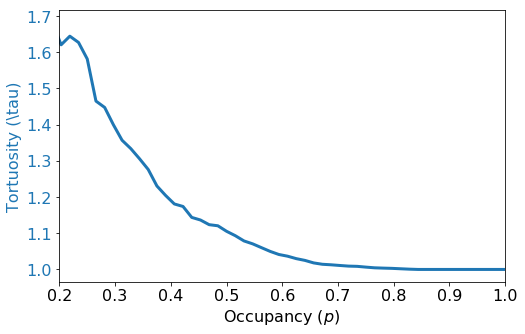

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
data = np.loadtxt("percol.tortuosity")
fig, ax = plt.subplots(figsize=(8,5))

x_c = 0.199

ax.set_xlim(0.199,1)
ax.set_xlabel("Occupancy ($p$)", fontsize=16)
ax.set_ylabel(r"Tortuosity (\tau)", fontsize=16, color="tab:blue")
ax.tick_params(labelsize=16)
ax.tick_params(axis='y', labelcolor="tab:blue")

ax.plot(data[:,1], data[:,2], linewidth=3, color="tab:blue")
plt.show()

As seen in the plot, tortuosity is not yet very well converged as we only used 10 Monte Carlo samples.  Additionally, the values near the percolation threshold are likely not yet converged with the cell size.  However, the overall trend is clear: For concentrations just above the percolation threshold the tortuosity is $\tau>1.6$, i.e., diffusion pathways lead to detours of more than 60% of the diffusion distance.  Only above site concentrations of $\sim{}0.7$ the tortuosity approaches $1.0$ meaning that the diffusion pathways span the structure without detour.